<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3_01: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

## Imports

In [1]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [2]:
# Read in the citibike data in the data folder in this repository.
citibike = pd.read_csv('./data/citibike_feb2014.csv')

## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [3]:
citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               224736 non-null  object 
 14  gend

In [4]:
citibike.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [5]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


## Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

### Hypothesis testing
---
* $ H_0:$ average trip duration of `gender=1` = average trip duration of `gender=2`
* $ H_A:$ average trip duration of `gender=1` $\neq$ average trip duration of `gender=2`

In [6]:
g1=citibike.loc[citibike['gender']==1, 'tripduration']
g2=citibike.loc[citibike['gender']==2, 'tripduration']

In [7]:
print(g1.mean())
print(g2.mean())

814.0324088236293
991.3610742785506


In [8]:
g2.mean() - g1.mean()

177.3286654549213

---
### Difference in means between the 2 groups is 177.33, but is it statistically significant?
---
* Do 1 sample T-test to find out statistical significance

In [9]:
# Import scipy.stats
from scipy import stats

In [10]:
# Conduct our t-test.
stats.ttest_ind(g2,g1, equal_var=False)

Ttest_indResult(statistic=4.802922158264667, pvalue=1.5680482053980446e-06)

In [11]:
t_stat, p_value = stats.ttest_ind(g2,g1, equal_var=False)
print(t_stat)
print(p_value)

4.802922158264667
1.5680482053980446e-06


---
### Conclusion: by setting an $\alpha$ value of 0.05
---
* p-value < 0.05
* Sufficient evidence to reject null hypothesis
* There is statistically significant difference between the 2 groups

## What numeric columns shouldn't be treated as numeric?

In [12]:
citibike.columns.tolist()

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender']

**Answer:**
* starttime
* stoptime
* start station id
* end station id
* bikeid
* birth year
* gender

## Dummify the `start station id` Variable

In [13]:
st_id = pd.get_dummies(citibike['start station id'], prefix='stid')
st_id.head()

,stid_72,stid_79,stid_82,stid_83,stid_116,stid_119,stid_120,stid_127,stid_128,stid_137,...,stid_2006,stid_2008,stid_2009,stid_2010,stid_2012,stid_2017,stid_2021,stid_2022,stid_2023,stid_3002
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
st_id.shape

(224736, 329)

## Dummify the `usertype` variable
---
* Need to use the variable for linear regression later on

In [15]:
user_df = pd.get_dummies(citibike['usertype'], prefix='user')
user_df.head()

,user_Customer,user_Subscriber
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [16]:
user_df.shape

(224736, 2)

In [17]:
citibike.shape

(224736, 15)

In [18]:
citibike_1 = pd.concat([citibike, st_id, user_df], axis=1)

citibike_1.shape

(224736, 346)

In [19]:
citibike_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,stid_2009,stid_2010,stid_2012,stid_2017,stid_2021,stid_2022,stid_2023,stid_3002,user_Customer,user_Subscriber
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,...,0,0,0,0,0,0,0,0,0,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,...,0,0,0,0,0,0,0,0,0,1
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,...,0,0,0,0,0,0,0,0,0,1
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,...,0,0,0,0,0,0,0,0,0,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,...,0,0,0,0,0,0,0,0,0,1


## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit.

In [20]:
# citibike['birth year'].astype('Int64')
# error value '\\N'
# replace '\\N' with null value
citibike_1['birth year'].replace(to_replace='\\N', value=np.nan, inplace=True)

In [21]:
# count null values
citibike_1['birth year'].isnull().sum()

6717

In [22]:
# view null values in dataframe
citibike_1.loc[citibike_1['birth year'].isnull(), ['birth year']]

,birth year
31,NaN
55,NaN
222,NaN
266,NaN
293,NaN
...,...
224385,NaN
224438,NaN
224525,NaN
224536,NaN


In [23]:
# convert 'birth year' column to dtype float64 (numpy dtype, int64 not accepted for null values)
citibike_2 = citibike_1.astype({'birth year': 'float64'})

In [24]:
# check conversion
citibike_2['birth year'].dtype

dtype('float64')

In [25]:
# new 'age' feature
citibike_2['age'] = citibike_2['birth year'].map(lambda x: 2014-x, na_action=None)

C:\Users\Maybelle\AppData\Local\Temp\ipykernel_22496\3112942699.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  citibike_2['age'] = citibike_2['birth year'].map(lambda x: 2014-x, na_action=None)


In [26]:
citibike_2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,stid_2010,stid_2012,stid_2017,stid_2021,stid_2022,stid_2023,stid_3002,user_Customer,user_Subscriber,age
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,...,0,0,0,0,0,0,0,0,1,23.0
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,...,0,0,0,0,0,0,0,0,1,35.0
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,...,0,0,0,0,0,0,0,0,1,66.0
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,...,0,0,0,0,0,0,0,0,1,33.0
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,...,0,0,0,0,0,0,0,0,1,24.0


## `age` has null values, which is not accepted in linear regression
---
* drop the rows with null values in age column

In [27]:
citibike_2['age'].isnull().sum()

6717

In [28]:
citibike_3 = citibike_2.dropna(subset='age')
citibike_3.shape

(218019, 347)

In [29]:
# check 'age' data type
citibike_3['age'].dtype

dtype('float64')

## Split your data into train/test data

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.)

**NOTE:** When doing your train/test split, please use random seed 123.

In [30]:
X = citibike_3.drop(columns=['tripduration',
                             'starttime',
                             'stoptime',
                             'start station id',
                             'start station name',
                             'start station latitude',
                             'start station longitude',
                             'end station id',
                             'end station name',
                             'end station latitude',
                             'end station longitude',
                             'bikeid',
                             'usertype',
                             'birth year',
                      ] )
y = citibike_3['tripduration']

In [31]:
print(X.shape, y.shape)

(218019, 333) (218019,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(174415, 333) (43604, 333) (174415,) (43604,)


In [34]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [36]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [37]:
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
print(train_mse, test_mse)

33236301.42377713 16855005.536914993


In [38]:
mse_perc_diff = abs((train_mse - test_mse)/ train_mse)*100
print(mse_perc_diff,'%')

49.28736106341549 %


## Evaluation using mean squared error
---
* Comparison with null model

### The Null model
---
* y = `tripduration`
* X = `age`, dummies of `usertypes`, `gender`, and dummies of `start station id`

In [39]:
len(y_train)

174415

In [40]:
len(y_test)

43604

In [41]:
y_train_mean = np.mean(y_train)
y_test_mean = np.mean(y_test)

y_train_bar = np.empty(174415)
y_train_bar.fill(y_train_mean)

y_test_bar = np.empty(43604)
y_test_bar.fill(y_test_mean)

In [42]:
type(y_test_bar)

numpy.ndarray

In [43]:
# null MSE
null_train_mse = metrics.mean_squared_error(y_train, y_train_bar)
null_test_mse = metrics.mean_squared_error(y_test, y_test_bar)
print(null_train_mse, null_test_mse)

33360803.44516777 16774167.245112028


In [44]:
# percentage difference in error for performance on train vs test data
mse_perc_diff = abs((null_train_mse - null_test_mse)/ null_train_mse)*100
print(mse_perc_diff,'%')

49.71893505897645 %


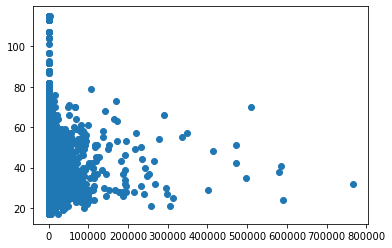

In [45]:
plt.scatter(x=citibike_3['tripduration'], y=citibike_3['age']);

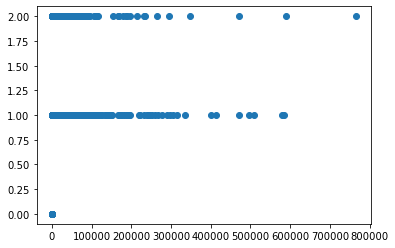

In [46]:
plt.scatter(x=citibike_3['tripduration'], y=citibike_3['gender']);

### Interpretation:
---
* The linear regression model performance is not better than null model
* Need to consider removing outliers for `tripduration` in data for better model fitting

## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [47]:
import statsmodels.api as sm

In [48]:
X = citibike_3.drop(columns=['tripduration',
                             'starttime',
                             'stoptime',
                             'start station id',
                             'start station name',
                             'start station latitude',
                             'start station longitude',
                             'end station id',
                             'end station name',
                             'end station latitude',
                             'end station longitude',
                             'bikeid',
                             'usertype',
                             'birth year',
                      ] )
y = citibike_3['tripduration']

In [49]:
X = sm.add_constant(X, prepend=True)
results = sm.OLS(y, X).fit()

In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.074
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           6.57e-27
Time:                        15:23:53   Log-Likelihood:            -2.1860e+06
No. Observations:              218019   AIC:                         4.373e+06
Df Residuals:                  217688   BIC:                         4.376e+06
Df Model:                         330                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
gender            180.1440     30.175      5.970      0.000     121.002     239.286
stid_72           109.6419    217.332      0.504      0.614    -316.323     535.607
stid_79            83.3963    219.937      0.379      0.705    -347.675     514.468
stid_82           362.2643    331.632      1.092      0.275    -287.726    1012.255
stid_83           -70.1981    325.695     -0.216      0.829    -708.552     568.156
stid_116         -261.5534    150.071     -1.743      0.081    -555.688      32.581
stid_119         -222.9842    736.524     -0.303      0.762   -1666.552    1220.584
stid_120          871.0894    575.867      1.513      0.130    -257.595    1999.773
stid_127         -205.7533    174.221     -1.181      0.238    -547.222     135.716
stid_128         -213.0492    164.384     -1.296      0.195    -535.239     109.140
stid_137         -234.3674    248.423     -0.943      0.345    -721.270     252.535
stid_143         -210.1843    407.417     -0.516      0.606   -1008.712     588.343
stid_144            0.9804    589.104      0.002      0.999   -1153.648    1155.609
stid_146         -329.8664    243.484     -1.355      0.175    -807.088     147.356
stid_147            9.1063    182.491      0.050      0.960    -348.572     366.785
stid_150          179.2919    236.622      0.758      0.449    -284.481     643.065
stid_151         -269.7916    132.791     -2.032      0.042    -530.059      -9.524
stid_152         -278.5378    285.266     -0.976      0.329    -837.652     280.576
stid_153         -206.2141    172.619     -1.195      0.232    -544.543     132.115
stid_157          183.7485    311.696      0.590      0.556    -427.168     794.665
stid_160          -65.2544    219.574     -0.297      0.766    -495.614     365.105
stid_161         -294.1848    161.086     -1.826      0.068    -609.909      21.539
stid_164         -152.9824    216.322     -0.707      0.479    -576.967     271.003
stid_167         -149.5654    179.279     -0.834      0.404    -500.948     201.817
stid_168         -201.1940    150.417     -1.338      0.181    -496.008      93.620
stid_173         -246.2793    180.247     -1.366      0.172    -599.558     107.000
stid_174          390.6203    197.172      1.981      0.048       4.168     777.073
stid_195          388.3366    210.081      1.849      0.065     -23.417     800.090
stid_212         -168.6855    176.416     -0.956      0.339    -514.457     177.085
stid_216         -105.3503    657.613     -0.160      0.873   -1394.256    1183.555
stid_217           94.0358    575.876      0.163      0.870   -1034.666    1222.738
stid_218          301.5979    639.345      0.472      0.637    -951.502    1554.698
stid_223          -89.9758    186.721     -0.482      0.630    -455.944     275.993
stid_224         -272.4418    250.715     -1.087      0.277

## Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

**Answer**:

* Based on the Prob(F-statistic)<0.01, and `age` P>|t| is <0.05, age is likely to have a significant effect when predicting `tripduration`.

### Paired T-test
---
* $H_0:$ `age` does not have a significant effect when predicting `tripduration`
* $H_A:$ `age` has a significant effect when predicting `tripduration`
<br>
<br>
* value $\alpha=0.05$ is used arbitrarily

In [51]:
stats.ttest_ind(citibike_3['age'],citibike_3['tripduration'], equal_var=False)

Ttest_indResult(statistic=-68.93549976803251, pvalue=0.0)

**Answer**:

* p-value < 0.05, means $H_0$ is rejected.
* $H_A$ must be true.

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

**Answer**:

* Based on a high bias, low variance linear regression model, recommendations derived:
    * Gender = 2 (not sure which gender it refers to)
    * Age between 20 and 70 years old
    * Subscribers
* More evaluation required for `age` range, `tripduration` data has a wide variance, need to narrow down the population for better conclusions